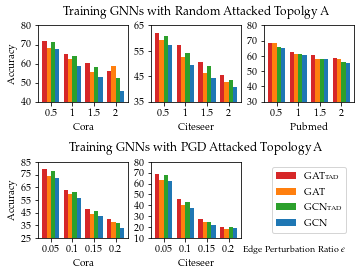

In [119]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
# Enable Tex mode for matplot lib
import matplotlib as mpl
try:
    import subprocess
    subprocess.check_call(["latex"])
except:
    import os 
    os.environ["PATH"] += os.pathsep + '/usr/bin/latex /usr/share/man/man1/latex.1.gz'
    mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()

def draw_dataset(ax, x, xticklabels, ys, labels, width, ylim, legend=False, x_label=None, y_label=False, step=10, text=None):
    colors = ['tab:red', 'tab:orange', 'tab:green',  'tab:blue']
    rects1 = ax.bar(x - width/2 - width, ys[0], width, label=labels[0], color=colors[0])
    rects2 = ax.bar(x - width/2, ys[1], width, label=labels[1], color=colors[1])
    rects3 = ax.bar(x + width/2, ys[2], width, label=labels[2], color=colors[2])
    rects4 = ax.bar(x + width/2 + width, ys[3], width, label=labels[3], color=colors[3])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    if y_label:
        ax.set_ylabel('Accuracy')
    if x_label:
        ax.set_xlabel(x_label)
    ax.set_xticks(x)
    ax.set_xticklabels(xticklabels)
    ax.set_ylim(ylim[0], ylim[1])
    
    yticks = np.arange(ylim[0], ylim[1]+step, step=step)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks)

    if legend:
        ax.legend()
        for i in range(4):
            # Put a legend below current axis
            ax.legend(loc='upper center', bbox_to_anchor=(1.75, 1.0),
                fancybox=True, shadow=False, ncol=1, prop={'size': 10})
    if text:
        ax.text(0, 0, text)

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)
    
rn_xticklabels = ['0.5', '1', '1.5', '2']
pgd_xticklabels = ['0.05', '0.1', '0.15', '0.2']
labels = [
    'GAT\scriptsize{TAD}', 
    'GAT',      
    'GCN\scriptsize{TAD}', 
    'GCN',    
]

rn_cora = [
    [72.11, 64.85, 60.38, 55.98],
    [68.33, 62.48, 55.50, 58.93],
    [71.51, 63.90, 58.06, 52.54],
    [67.63, 58.52, 52.86, 45.33],
]
rn_citeseer = [
    [62.20, 57.17, 50.65, 45.41],
    [59.47, 52.42, 46.35, 42.84],
    [60.92, 54.03, 48.85, 43.68],
    [57.24, 49.48, 44.31, 40.87],
]
pgd_cora = [
    [78.98,62.50,48.17,40.13],
    [73.64, 59.37, 43.65,37.33],
    [77.72, 60.94, 46.37, 36.79],
    [72.58, 56.85, 41.99, 32.70],
]
pgd_citeseer = [
    [68.37,45.50, 27.17,20.13],
    [63.64, 40.37, 24.65,18.33],
    [67.87, 43.35, 24.80, 19.62],
    [61.95, 37.78, 21.89, 18.85],
]
citeseer = [
    [57.41, 49.84, 43.97, 39.31],
    [57.65, 50.35, 45.80, 42.47],
    [57.17, 49.42, 44.45, 40.12],
    [58.20, 51.47, 47.69, 42.55],
]

# x = np.array([0, 1, 2, 3])*0.25  # the label locations
# width = 0.05  # the width of the bars
# def cm2inch(value):
#     return value/2.54
# figsize=(cm2inch(13),cm2inch(10))

#             #'$\varepsilon$ for Random Noise Attack'
# fig, axs = plt.subplots(2, 3, figsize=figsize)


# draw_dataset(axs[0,0], x, rn_xticklabels, rn_cora, labels, width, [40, 80], y_label=True, step=10)
# draw_dataset(axs[0,1], x, rn_xticklabels, rn_citeseer, labels, width, [35, 65],step=10)
# draw_dataset(axs[0,2], x, rn_xticklabels, rn_cora, labels, width, [30, 80],step=10, x_label='Pubmed')
# axs[0,1].set_title('Random Attack', fontsize=12)
# draw_dataset(axs[1,0], x, pgd_xticklabels, pgd_cora, labels, width, [25, 85], x_label='Cora', y_label=True,step=10)
# draw_dataset(axs[1,1], x, pgd_xticklabels, pgd_citeseer, labels, width, [10, 80], legend=True, x_label='Citeseer',step=10)

x = np.array([0, 1, 2, 3])*0.25  # the label locations
width = 0.05  # the width of the bars
def cm2inch(value):
    return value/2.54
figsize=(cm2inch(13),cm2inch(10))

            #'$\varepsilon$ for Random Noise Attack'
fig, axs = plt.subplots(2, 3, figsize=figsize)


draw_dataset(axs[0,0], x, rn_xticklabels, rn_cora, labels, width, [40, 80], y_label=True, step=10, x_label='Cora')
draw_dataset(axs[0,1], x, rn_xticklabels, rn_citeseer, labels, width, [35, 65], step=10, x_label='Citeseer')
draw_dataset(axs[0,2], x, rn_xticklabels, rn_pubmed, labels, width, [30, 80], step=10, x_label='Pubmed')
axs[0,1].set_title('Training GNNs with Random Attacked Topolgy A', fontsize=12, pad=10)
draw_dataset(axs[1,0], x, pgd_xticklabels, pgd_cora, labels, width, [25, 85], x_label='Cora', y_label=True)
draw_dataset(axs[1,1], x, pgd_xticklabels, pgd_citeseer, labels, width, [10, 80], legend=True, x_label='Citeseer')
axs[1,2].set_visible(False)
axs[1,1].set_title('Training GNNs with PGD Attacked Topology A', fontsize=12, pad=10)
axs[1,1].text(0.67, 0.100, 'Edge Perturbation Ratio ${\epsilon}$', fontsize=9, transform=plt.gcf().transFigure)
axs[1,2].set_visible(False)
fig.tight_layout()
plt.subplots_adjust(wspace=0.25)


# plt.show()
plt.savefig('robust_model.pdf')

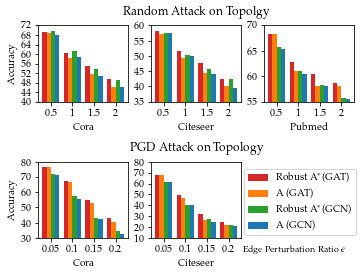

In [117]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
# Enable Tex mode for matplot lib
import matplotlib as mpl
try:
    import subprocess
    subprocess.check_call(["latex"])
except:
    import os 
    os.environ["PATH"] += os.pathsep + '/usr/bin/latex /usr/share/man/man1/latex.1.gz'
    mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()

def draw_dataset(ax, x, xticklabels, ys, labels, width, ylim, legend=False, x_label=None, y_label=False, step=10, text=None):
    colors = ['tab:red', 'tab:orange', 'tab:green',  'tab:blue']
    rects1 = ax.bar(x - width/2 - width, ys[0], width, label=labels[0], color=colors[0])
    rects2 = ax.bar(x - width/2, ys[1], width, label=labels[1], color=colors[1])
    rects3 = ax.bar(x + width/2, ys[2], width, label=labels[2], color=colors[2])
    rects4 = ax.bar(x + width/2 + width, ys[3], width, label=labels[3], color=colors[3])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    if y_label:
        ax.set_ylabel('Accuracy')
    if x_label:
        ax.set_xlabel(x_label)
    ax.set_xticks(x)
    ax.set_xticklabels(xticklabels)
    ax.set_ylim(ylim[0], ylim[1])
    
    yticks = np.arange(ylim[0], ylim[1]+step, step=step)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks)

    if legend:
        ax.legend()
        for i in range(4):
            # Put a legend below current axis
            ax.legend(loc='upper center', bbox_to_anchor=(1.65, 0.97),
                fancybox=True, shadow=False, ncol=1, prop={'size': 10})

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)
    
rn_xticklabels = ['0.5', '1', '1.5', '2']
pgd_xticklabels = ['0.05', '0.1', '0.15', '0.2']
labels = [
    'Robust A$^{*}$(GAT)', 
    'A (GAT)',      
    'Robust A$^{*}$(GCN)', 
    'A (GCN)',    
]
rn_cora = [
    [69.11, 60.33, 54.76, 49.53],
    [68.85, 58.48, 51.56, 46.06],
    [69.50, 61.38, 53.91, 49.06],
    [67.98, 58.93, 50.80, 46.08],
]
rn_citeseer = [
    [58.20, 51.47, 47.69, 42.55],
    [57.17, 49.42, 44.45, 40.12],
    [57.65, 50.35, 45.80, 42.47],
    [57.41, 49.84, 43.97, 39.31],
]
rn_pubmed = [
    [68.32, 62.80, 60.44, 58.74],
    [68.24, 61.00, 58.02, 57.98],
    [65.68, 61.08, 58.28, 55.78],
    [65.29, 60.52, 58.17, 55.45],
]

pgd_cora = [
    [76.77, 67.66, 54.84, 42.82],
    [76.56, 66.51, 52.74, 40.61],
    [72.17, 57.65, 43.26, 34.80],
    [71.13, 55.33, 42.60, 32.72],
]

pgd_citeseer = [
    [68.25,49.54,31.66,24.57],
    [67.97,46.85,26.44,21.48],
    [61.69, 40.65, 27.80, 22.08],
    [61.52, 39.95, 24.32, 20.59],
]
pgd_pubmed = [
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0],
]

x = np.array([0, 1, 2, 3])*0.25  # the label locations
width = 0.05  # the width of the bars
def cm2inch(value):
    return value/2.54
figsize=(cm2inch(13),cm2inch(10))

            #'$\varepsilon$ for Random Noise Attack'
fig, axs = plt.subplots(2, 3, figsize=figsize)


draw_dataset(axs[0,0], x, rn_xticklabels, rn_cora, labels, width, [40, 70], y_label=True, step=4, x_label='Cora')
draw_dataset(axs[0,1], x, rn_xticklabels, rn_citeseer, labels, width, [35, 60], step=5, x_label='Citeseer')
draw_dataset(axs[0,2], x, rn_xticklabels, rn_pubmed, labels, width, [55, 70], step=5, x_label='Pubmed')
axs[0,1].set_title('Random Attack on Topolgy', fontsize=12, pad=10)
draw_dataset(axs[1,0], x, pgd_xticklabels, pgd_cora, labels, width, [30, 80], x_label='Cora', y_label=True)
draw_dataset(axs[1,1], x, pgd_xticklabels, pgd_citeseer, labels, width, [10, 80], legend=True, x_label='Citeseer')

axs[1,2].set_visible(False)
axs[1,1].set_title('PGD Attack on Topology', fontsize=12, pad=10)
axs[1,1].text(0.67, 0.100, 'Edge Perturbation Ratio ${\epsilon}$', fontsize=9, transform=plt.gcf().transFigure)
fig.tight_layout()
plt.subplots_adjust(wspace=0.25)


# plt.show()
plt.savefig('robust_topo.pdf')